<a href="https://colab.research.google.com/github/av1155/TensorFlow/blob/main/Iris_Flower_Classification_using_TensorFlow_and_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


In [10]:
# Load the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
data = pd.read_csv(url, names=column_names)

# Encode the target variable
le = LabelEncoder()
data['target'] = le.fit_transform(data['class'])
data.drop('class', axis=1, inplace=True)

# Split the data into features and labels
X = data.drop('target', axis=1).values
y = data['target'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [12]:
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
4/4 [==============================] - 1s 3ms/step - loss: 1.3319 - accuracy: 0.3333
Epoch 2/50
4/4 [==============================] - 0s 3ms/step - loss: 1.2205 - accuracy: 0.3333
Epoch 3/50
4/4 [==============================] - 0s 3ms/step - loss: 1.1142 - accuracy: 0.3333
Epoch 4/50
4/4 [==============================] - 0s 4ms/step - loss: 1.0076 - accuracy: 0.3333
Epoch 5/50
4/4 [==============================] - 0s 3ms/step - loss: 0.9147 - accuracy: 0.3333
Epoch 6/50
4/4 [==============================] - 0s 3ms/step - loss: 0.8230 - accuracy: 0.3333
Epoch 7/50
4/4 [==============================] - 0s 5ms/step - loss: 0.7346 - accuracy: 0.3333
Epoch 8/50
4/4 [==============================] - 0s 4ms/step - loss: 0.6514 - accuracy: 0.3333
Epoch 9/50
4/4 [==============================] - 0s 4ms/step - loss: 0.5748 - accuracy: 0.3333
Epoch 10/50
4/4 [==============================] - 0s 4ms/step - loss: 0.4973 - accuracy: 0.3667
Epoch 11/50
4/4 [======================

In [15]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)

1/1 [==============================] - 0s 173ms/step - loss: -1.2659 - accuracy: 0.5667
Test accuracy: 0.5666666626930237


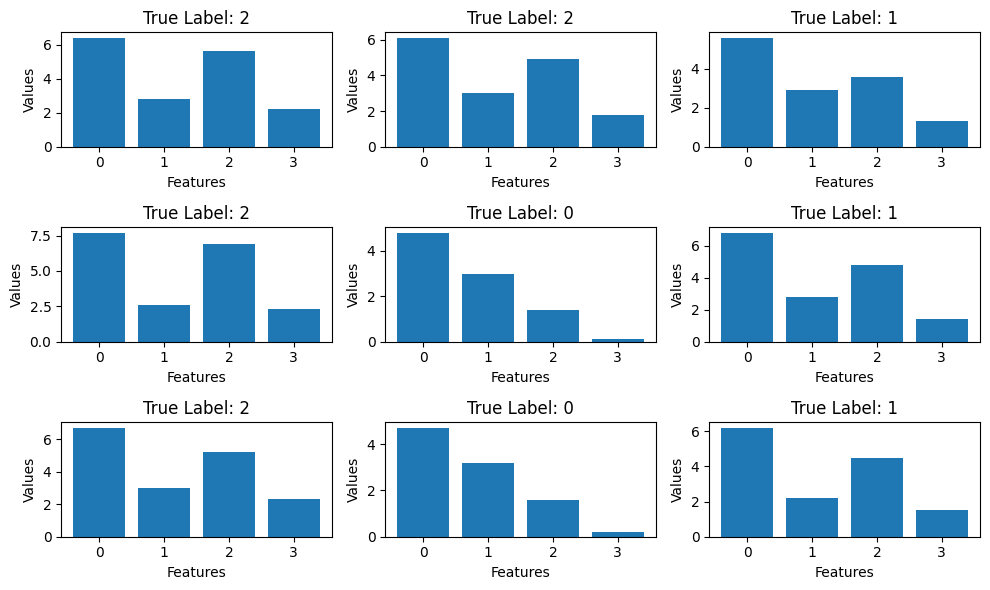

In [19]:
# Define the plot_images function
def plot_data(features, labels, predicted_labels=None):
    plt.figure(figsize=(10, 6))

    for i in range(len(features)):
        plt.subplot(3, 3, i + 1)
        plt.bar(range(len(features[i])), features[i])
        plt.xlabel("Features")
        plt.ylabel("Values")
        plt.title(f"True Label: {labels[i]}")
        if predicted_labels is not None:
            plt.title(f"True: {labels[i]}, Predicted: {predicted_labels[i]}")

    plt.tight_layout()
    plt.show()

# Plot random test data with their true labels
random_test_indices = np.random.randint(0, len(X_test), 9)
random_test_data = X_test[random_test_indices]
random_test_labels = y_test[random_test_indices]
plot_data(random_test_data, random_test_labels)